In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import collections
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,13)})



In [132]:
EVENTS = ['target', 'source', 'action', 'location', 'date', 'action_type']

# Data Processing Methods

In [133]:
def my_function(row):
    row = set(row)
    row = list(row)
    return row


def process_column(df, col):
    df.fillna("NotFound", inplace=True)
    df[col] = df[col].str.strip('[]').str.split(',')
    df[col] = df[col].apply(my_function)
    
    
def check_vals(df1, df2, col):
    # the first one should be master
    df1['main'] = df1[col] # master
    df2['ra'] = df2[col]
    
#     df1['news1'] = df1['news']
#     df2['news2'] = df2['news']
    
    df1 = df1.loc[:, ['id', 'main']]
    df2 = df2.loc[:, ['id', 'ra']]
    df = df1.join(df2.set_index('id'), on='id')
    
    return df

def compare_values(x):
    if collections.Counter(x['main']) == collections.Counter(x['ra']):
        return True
    else:
        return False

In [224]:
def proceess_text(data):
    for i in range(len(data)):
        data[i] = ''.join(c for c in data[i] if c not in '"')
        data[i] = ''.join(c for c in data[i] if c not in '\'')
        data[i] = ''.join(data[i].split(' '))

In [225]:
import itertools
from collections import defaultdict

"""
    
    This method takes an nested list of strings. After that it flattens the entire array. For example,
    [['kidnapped', 'killed'], ['injured']] becomes ['kidnapped', 'killed','injured']

"""

def flatten_list(data, K):
    # 
    flatten = list(itertools.chain.from_iterable(data))
    proceess_text(flatten)
    records = defaultdict(int)
    track = []
    for i in flatten:
        records[i] += 1
    for k, v in records.items():
        track.append((v, k))
    track.sort(key = lambda x : [-x[0]])
    track = track[0:K]
    keep = set()
    for i in track:
        keep.add(i[1])
    final_list = []
    for i in flatten:
        if i in keep:
            final_list.append(i)
    return final_list

# Read and Check Data

In [248]:
p1 = pd.read_csv('Data/p1.csv', header=[0])
p2 = pd.read_csv('Data/p2.csv', header=[0])
p3 = pd.read_csv('Data/p3.csv', header=[0])
df1 = pd.read_csv("Data/news_sample_data_2000.tsv", sep='\t')

df = pd.concat([p1, p2, p3], ignore_index=True)
df.set_index('id')
df1.set_index('index')
df['country'] = df1['location']

In [249]:
df.head(5)

,id,target,source,action,action_type,location,date,news,country
0,25445,"['Artisan Restaurant', 'foreigners', 'hostages']","['attackers', 'suicide fighters', 'suicide sol...","['gun battle', 'killing', 'injuring']","['Armed Assault', 'Armed Assault', 'Armed Assa...",['Dhaka'],"['August', '27th']",Islamic State IS in the latest issue of its on...,india
1,32355,"['Rangers', 'Rangers', 'Military Police']","['Lashkar e Jhangvi LeJ', 'militants', 'milita...","['killing', 'killed', 'gunned']","['Armed Assault', 'Armed Assault', 'Armed Assa...",['Karachi'],['December 6'],Two Lashkar e Jhangvi LeJ militants Asim alias...,india
2,32398,"['Security Forces', 'SFs', 'civilians']",NaN,"['killed', 'fighting', 'wounded', 'fighting', ...","['Unknown', 'Unknown', 'Unknown', 'Unknown', '...",NaN,['December 20'],The Commander Southern Command Lieutenant Gene...,india
3,29171,"['Naga', 'Naga', 'Nagas', 'Naga']","['Manipur Naga Peopleâ€™s Front', 'MNPF', 'MNP...","['explosion', 'exploded', 'bomb', 'attack']","['Bombing/Explosion', 'Bombing/Explosion', 'Bo...",NaN,['August 30'],Meanwhile the underground organization Manipur...,india
4,25445,"['Artisan Restaurant', 'foreigners', 'hostages']","['attackers', 'suicide fighters', 'suicide sol...","['gun battle', 'killing', 'injuring']","['Armed Assault', 'Armed Assault', 'Armed Assa...",['Dhaka'],"['August', '27th']",Islamic State IS in the latest issue of its on...,pakistan


In [250]:
print(df.shape)

(276, 9)


In [251]:
# process - masteer
for i in EVENTS:
    process_column(df, i)

In [252]:
df.head()

,id,target,source,action,action_type,location,date,news,country
0,25445,"[ 'hostages', 'Artisan Restaurant', 'foreigne...","[ 'suicide soldiers', 'attackers', 'suicide f...","[ 'killing', 'injuring', 'gun battle']","[ 'Armed Assault', 'Armed Assault']",['Dhaka'],"['August', '27th']",Islamic State IS in the latest issue of its on...,india
1,32355,"[ 'Military Police', 'Rangers', 'Rangers']","[ 'militants', 'Lashkar e Jhangvi LeJ']","[ 'gunned', 'killing', 'killed']","[ 'Armed Assault', 'Armed Assault']",['Karachi'],['December 6'],Two Lashkar e Jhangvi LeJ militants Asim alias...,india
2,32398,"[ 'civilians', 'SFs', 'Security Forces']",[NotFound],"[ 'killing', 'fighting', 'killed', 'wounded']","[ 'Unknown', 'Unknown']",[NotFound],['December 20'],The Commander Southern Command Lieutenant Gene...,india
3,29171,"['Naga', 'Naga', 'Nagas']","[ 'MNPF', 'Manipur Naga Peopleâ€™s Front']","['explosion', 'bomb', 'attack', 'exploded']","[ 'Bombing/Explosion', 'Bombing/Explosion']",[NotFound],['August 30'],Meanwhile the underground organization Manipur...,india
4,25445,"[ 'hostages', 'Artisan Restaurant', 'foreigne...","[ 'suicide soldiers', 'attackers', 'suicide f...","[ 'killing', 'injuring', 'gun battle']","[ 'Armed Assault', 'Armed Assault']",['Dhaka'],"['August', '27th']",Islamic State IS in the latest issue of its on...,pakistan


In [253]:
df.loc[0, :][1][1]

"'Artisan Restaurant'"

# Data Visulization

## 1. 0 - Ratio - Relevant vs Not Relevant

In [254]:
relevant = (len(df)/1500)*100
not_relevant = ((1500 - len(df))/1500)*100


print("Relevant news is - ", relevant, "%")
print("Not Relevant news is - ", not_relevant, "%")

Relevant news is -  18.4 %
Not Relevant news is -  81.6 %


## 1.1 Event Distribution

In [261]:
K = 10

action = flatten_list(df['action'].values, K)
target = flatten_list(df['target'].values, K)
source = flatten_list(df['source'].values, K)
action_type = flatten_list(df['action_type'].values, K)

In [262]:
from collections import Counter

Counter(source).most_common(20)


[('militants', 76),
 ('CPIMaoist', 55),
 ('CommunistPartyofIndiaMaoist', 47),
 ('NotFound', 39),
 ('Maoists', 25),
 ('Taliban', 18),
 ('assailants', 15),
 ('Militants', 15),
 ('militant', 9),
 ('LeT', 8)]

In [263]:
Counter(target)

Counter({'civilians': 19,
         'SFs': 18,
         'SecurityForces': 17,
         'man': 9,
         'people': 12,
         'persons': 18,
         'Army': 14,
         'Police': 24,
         'CRPF': 16,
         'CentralReservePoliceForce': 12})

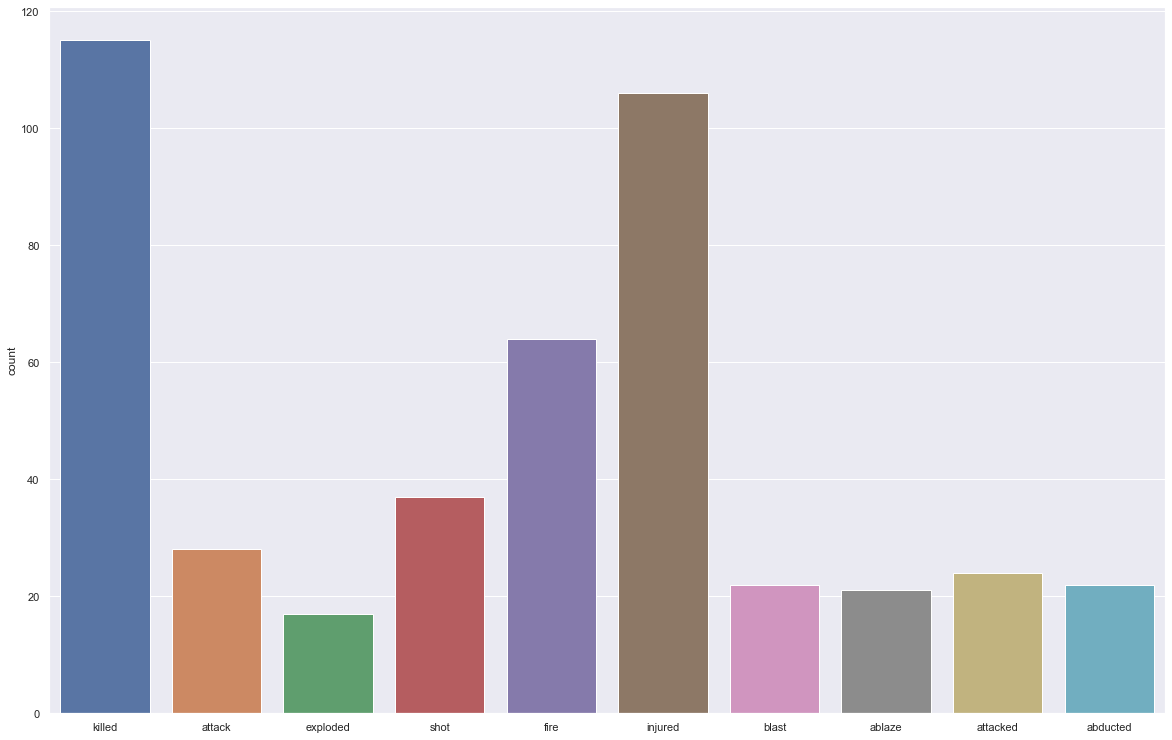

In [264]:
sns.countplot(x=action)

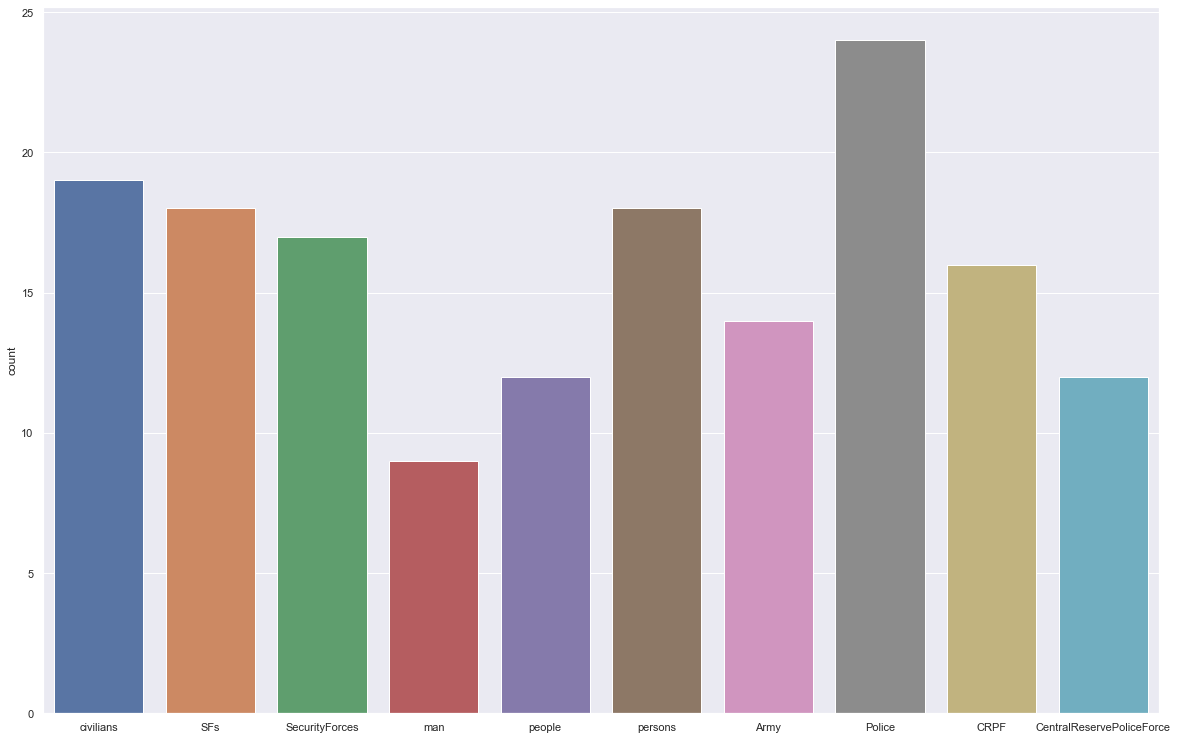

In [265]:
sns.countplot(x=target)

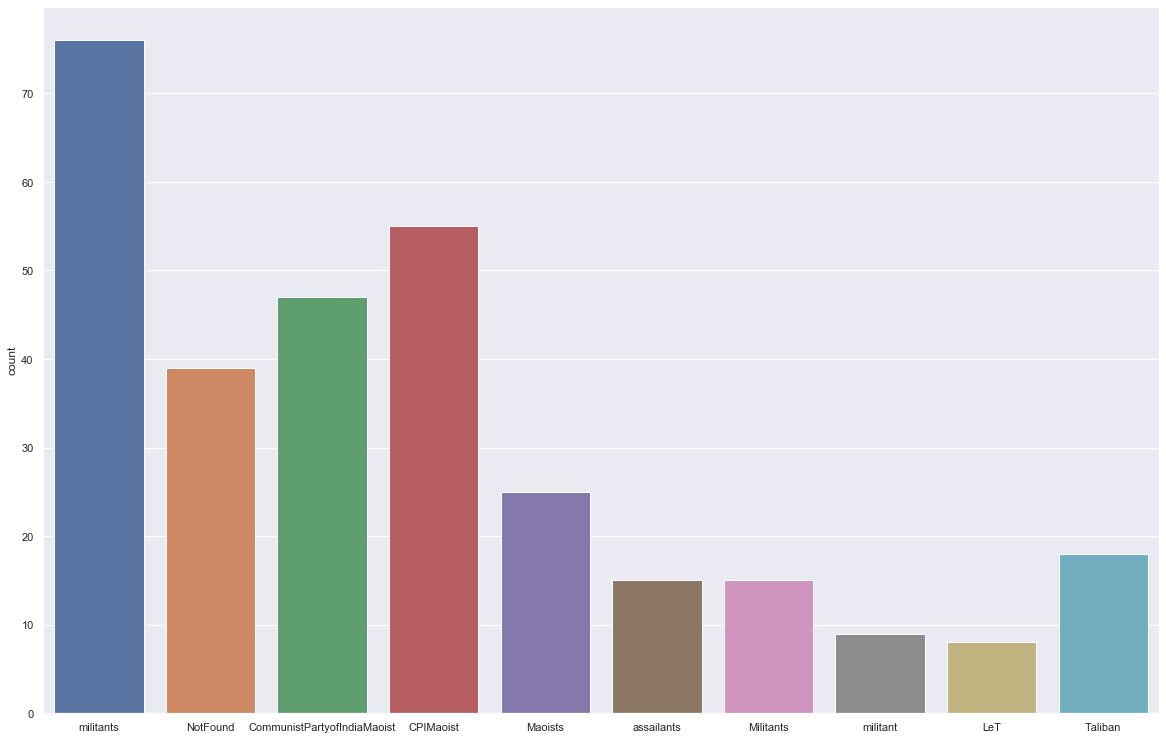

In [266]:
sns.countplot(x=source)

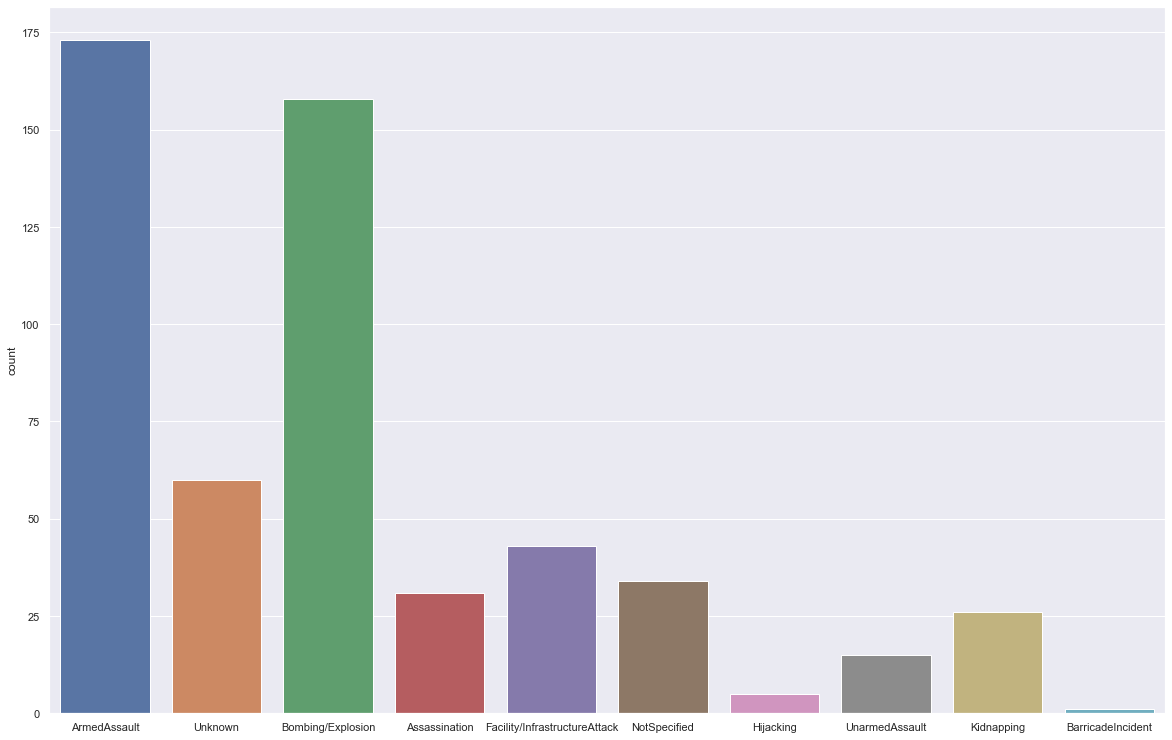

In [267]:
sns.countplot(x=action_type)

## Country Specific

In [277]:
df_India = df[df['country'] == "bangladesh"]
df_India.head(5)

,id,target,source,action,action_type,location,date,news,country
14,31902,"[ 'officers', 'navigator', 'people', 'people']",['Afghan Taliban'],"['hostage', 'fire']","[ 'Facility/Infrastructure Attack', 'Hijacking']","[ 'Logar', 'Mati', 'Azra', 'Afghanistan']",['August 4'],A Punjab Government Mi17 helicopter on August ...,bangladesh
62,25202,"['Purba Bangla Communist Party', 'PBCP']","[ 'RAB', 'Rapid Action Battalion']","[ 'injured', 'gunfight', 'killed']","[ 'Armed Assault', 'Armed Assault']",['Tangail'],['April 7'],Two cadres of Purba Bangla Communist Party PBC...,bangladesh
73,32051,['member'],[NotFound],['shot'],['Assassination'],['Peshawar'],['September 11'],A senior member of the polio eradication campa...,bangladesh
75,29454,['Bindeshwar'],"[ 'Maoist', 'Communist Party of India Maoist',...","['beaten', 'killed']","['Unarmed Assault', 'Armed Assault']","['Lohardaga', 'Lohardaga']",['September 17'],A 40 year old tribal Bindeshwar Oraon was beat...,bangladesh
79,31357,"[ 'worker', 'worker']",['unidentified militant'],['shot'],['Armed Assault'],['Khuga Khel'],['March 26'],A polio worker and supervisor in Expanded Prog...,bangladesh


In [278]:
K = 10

action = flatten_list(df_India['action'].values, K)
target = flatten_list(df_India['target'].values, K)
source = flatten_list(df_India['source'].values, K)
action_type = flatten_list(df_India['action_type'].values, K)

In [279]:
Counter(target)

Counter({'officers': 1,
         'navigator': 1,
         'people': 2,
         'PurbaBanglaCommunistParty': 1,
         'worker': 2,
         'vehicles': 2,
         'civilians': 2,
         'Soldier': 2,
         'passengertrain': 2,
         'woman': 2})

In [280]:
Counter(source)

Counter({'AfghanTaliban': 1,
         'RAB': 1,
         'RapidActionBattalion': 1,
         'NotFound': 3,
         'CommunistPartyofIndiaMaoist': 4,
         'CPIMaoist': 4,
         'Maoists': 2,
         'assailants': 2,
         'militants': 10,
         'Taliban': 3})